# Visualise Data on a Geographical Map to Identify Regions of Interest

In [1]:

# import libraries
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#for the gif
import os
import glob
import PIL
from PIL import Image, ImageEnhance, ImageOps
import imageio

## open the Zarr file

In [2]:
#insert the path you have saved the cube or go to tutorial Seasfire_datacube_tutorial.ipynb to see how to access it
ds=xr.open_zarr(Path.home() / 'SeasFire.zarr')

In [3]:
ds

<xarray.Dataset>
Dimensions:                         (latitude: 720, longitude: 1440, time: 966)
Coordinates:
  * latitude                        (latitude) float64 89.88 89.62 ... -89.88
  * longitude                       (longitude) float64 -179.9 -179.6 ... 179.9
  * time                            (time) datetime64[ns] 2001-01-01 ... 2021...
Data variables: (12/54)
    area                            (latitude, longitude) float32 dask.array<chunksize=(180, 360), meta=np.ndarray>
    cams_co2fire                    (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    cams_frpfire                    (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    drought_code_max                (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    drought_code_mean               (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    fcci_ba                         (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ...                              ...
    t2m_max                         (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    t2m_mean                        (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    t2m_min                         (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    tp                              (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    vpd                             (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ws10                            (time, latitude, longitude) float32 dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
Attributes:
    crs:          EPSG:4326
    description:  The SeasFire Cube is a scientific datacube for seasonal fir...
    title:        SeasFire Cube: A Global Dataset for Seasonal Fire Modeling ...

## We are making a gif in a loop with the total burned area (gwis_ba variable) for each year

## Similarly you can do the same for each variable you want

In [12]:
## in SeasFire Datacube v2.0 the burned area variables would have the water bodies masked with ERA-5 land sea mask 
# although while resampling and taking the sum nan values turn to 0. You can skip this by adding skipna=False in the sum but that there is a bug for that in the last year if data 2020
mask= ds['lsm'][:,:]

In [13]:
mask

<xarray.DataArray 'lsm' (latitude: 720, longitude: 1440)>
dask.array<open_dataset-f08a2c4b28e18a69406f417c83c7f659lsm, shape=(720, 1440), dtype=float32, chunksize=(180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * longitude  (longitude) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Attributes:
    long_name:  Land-sea mask
    provider:   ERA5
    units:      (0 - 1)

In [4]:
gwis=ds['gwis_ba']

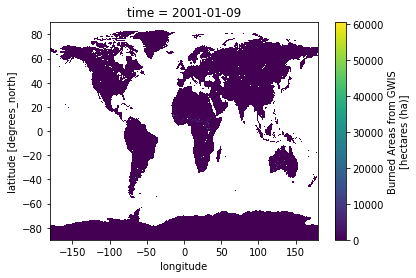

In [5]:
gwis[1,:,:].plot()

In [16]:
#resample to get yearly data 
gwis_all=gwis.resample(time="1Y").sum()

In [17]:

gwis_all= gwis_all.where(mask>0.5)


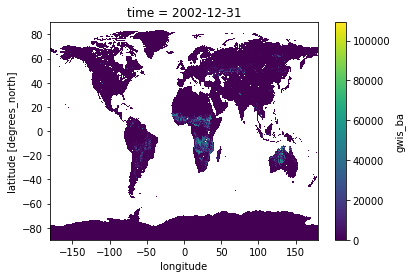

In [20]:
#check how it looks
gwis_all[1,:,:].plot()

## save the figures 

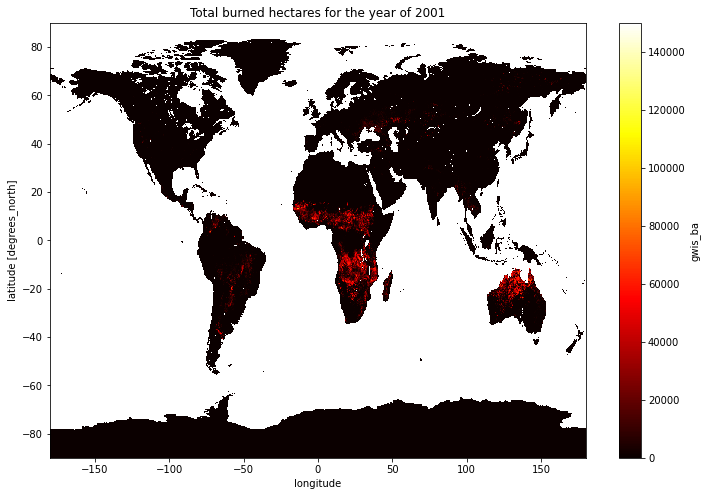

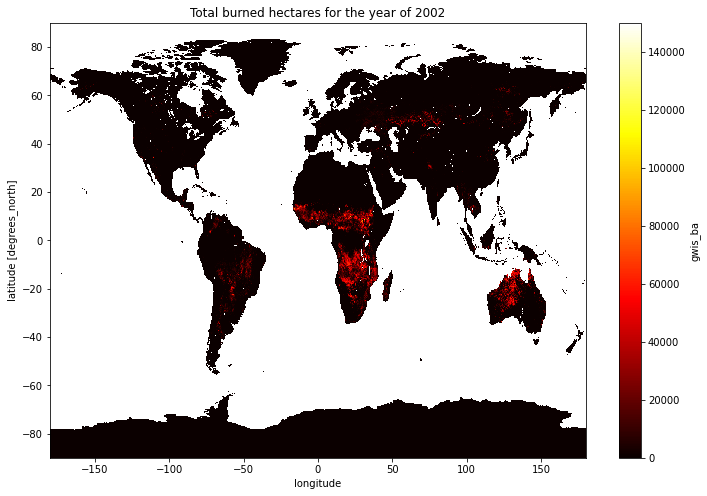

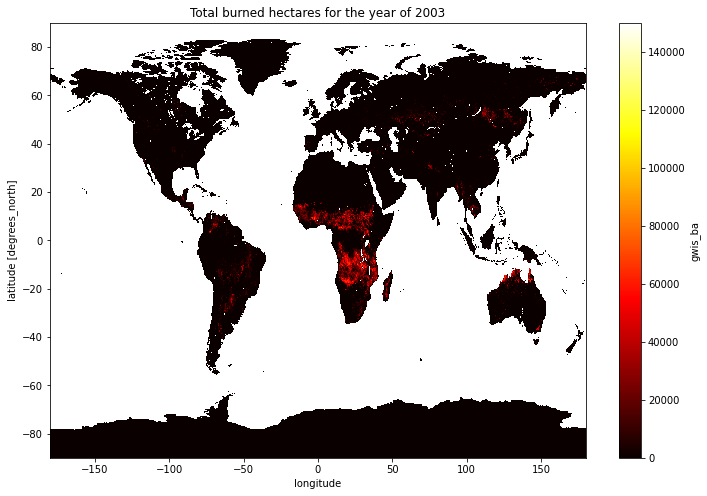

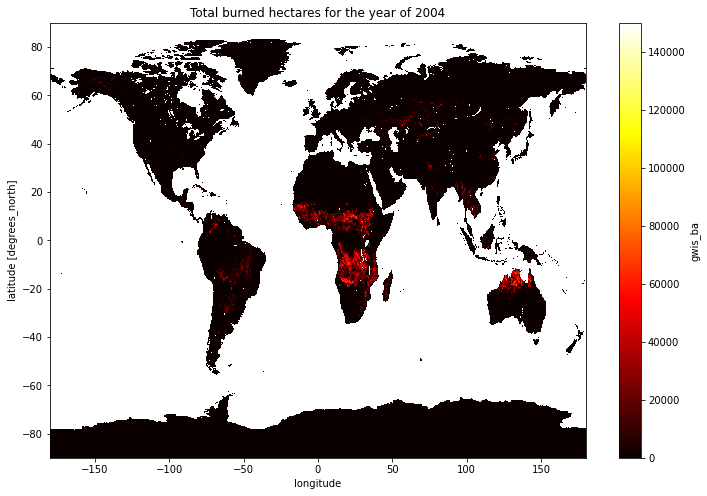

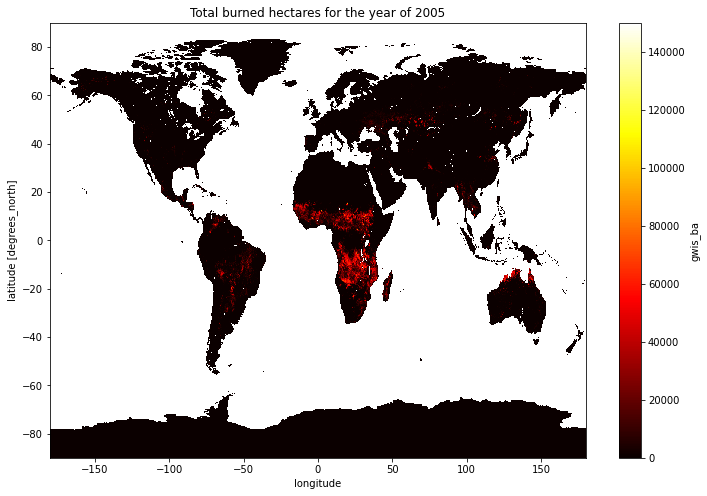

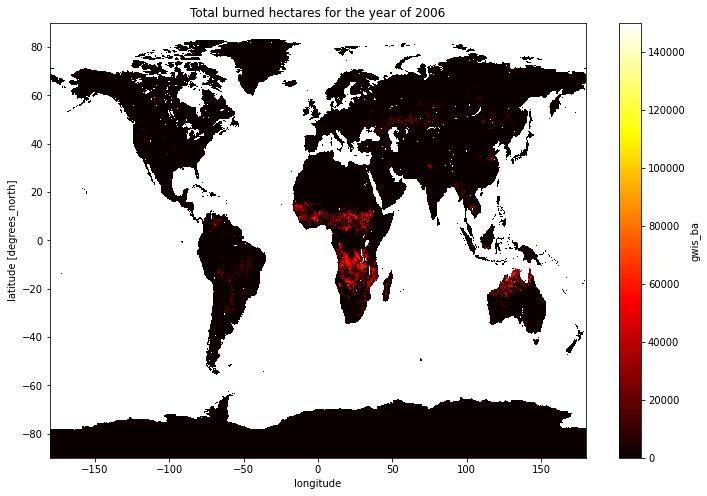

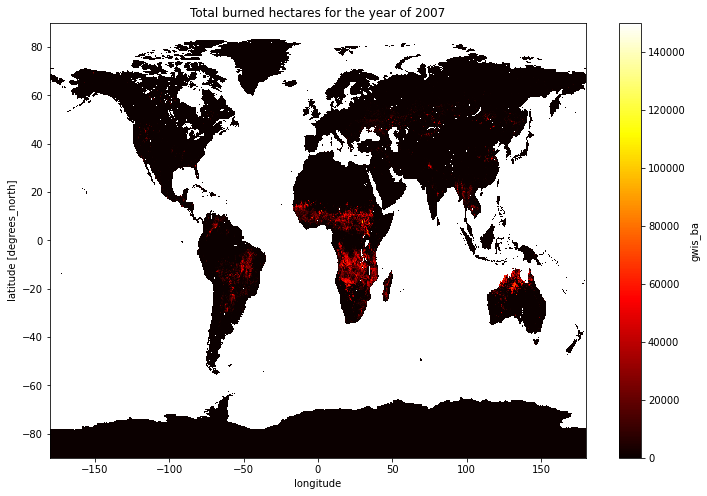

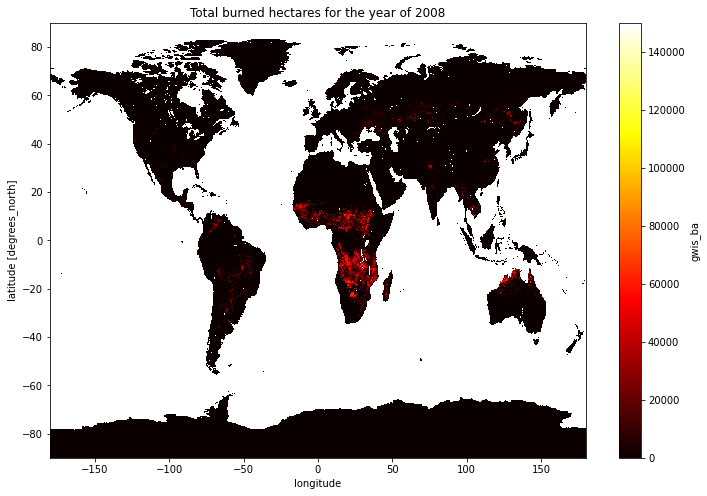

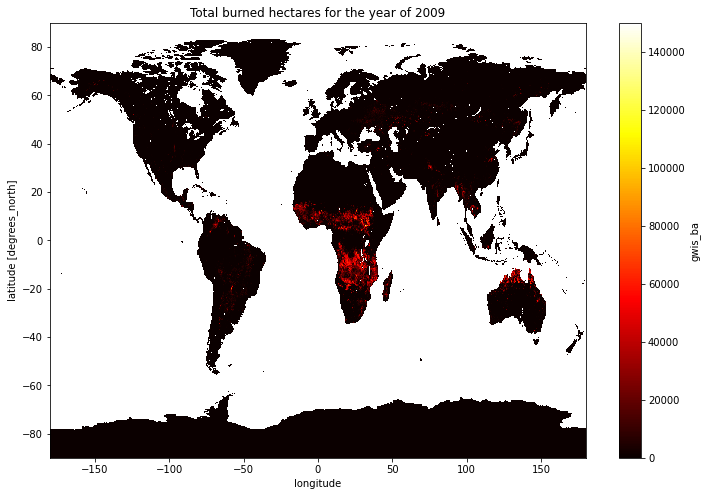

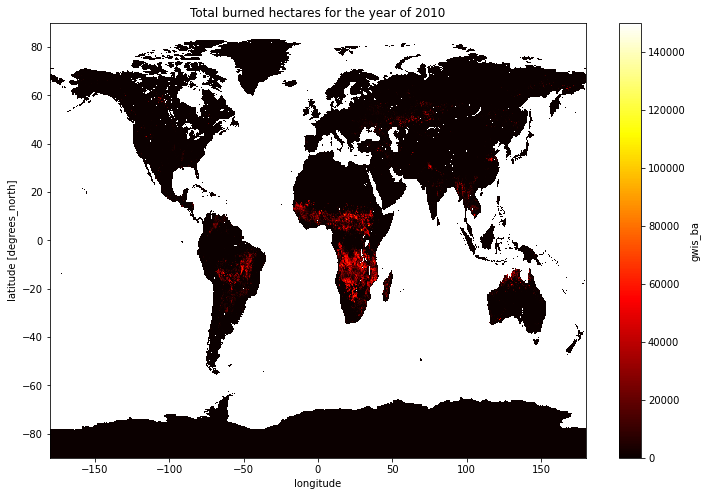

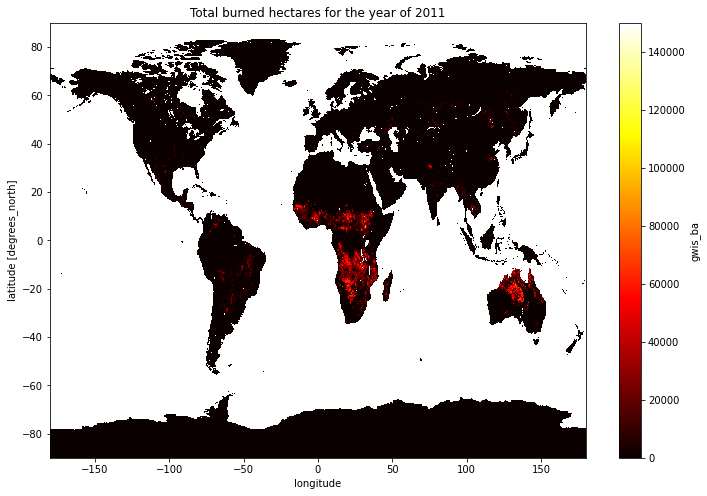

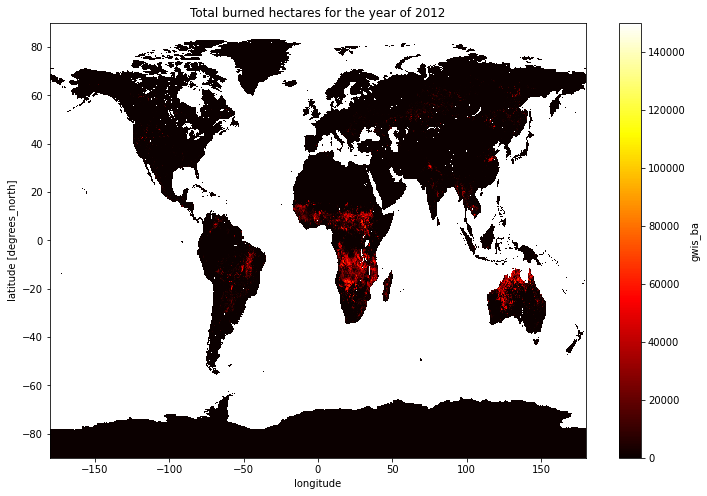

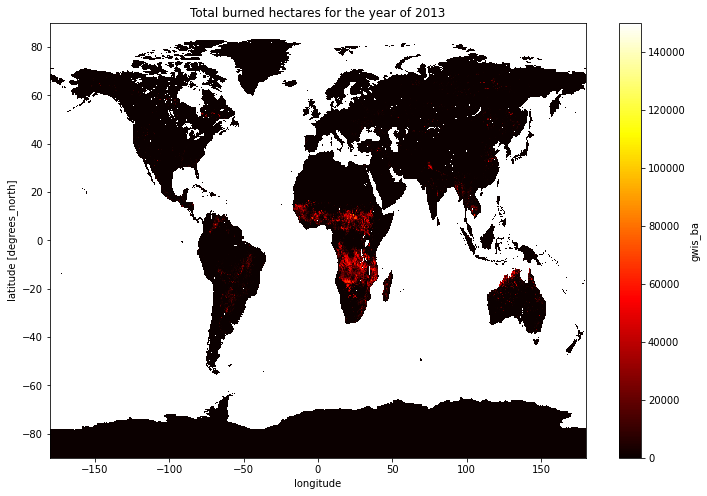

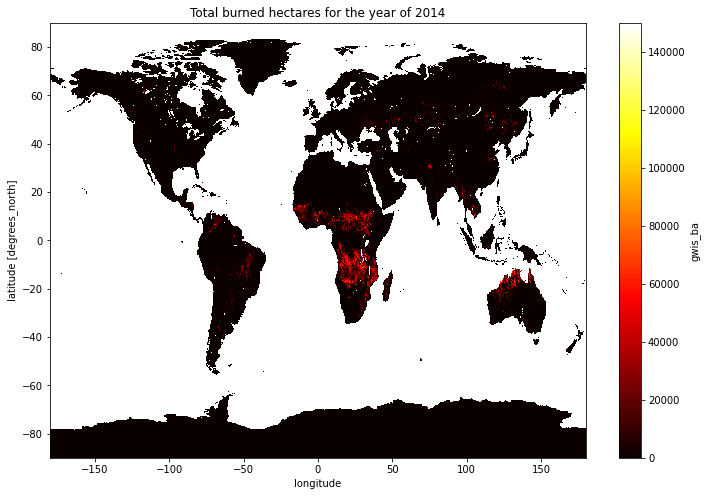

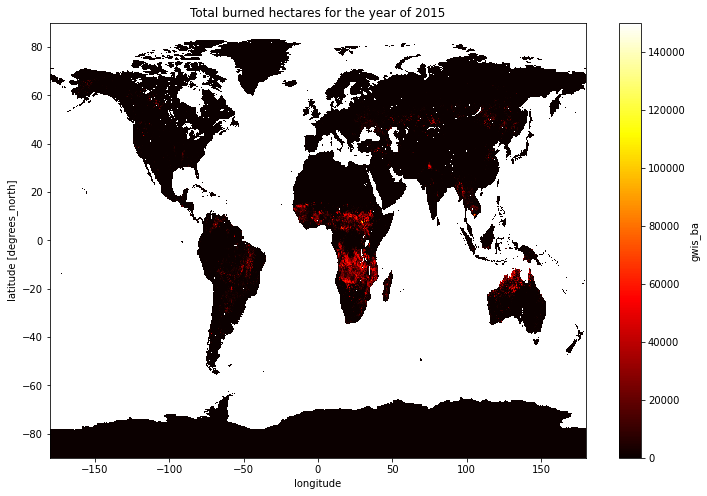

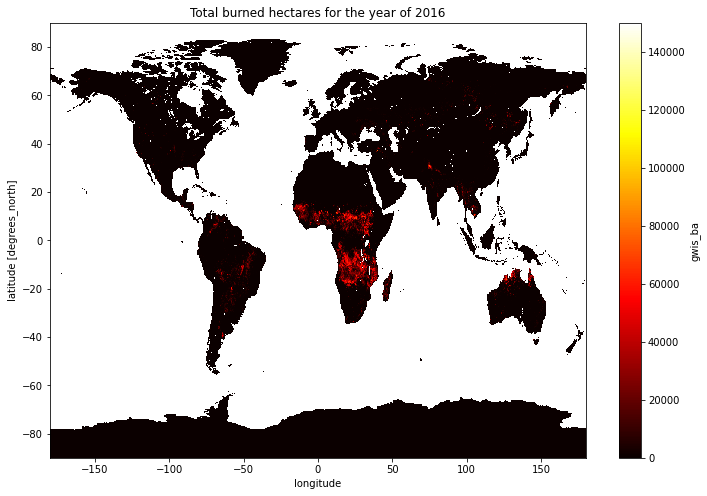

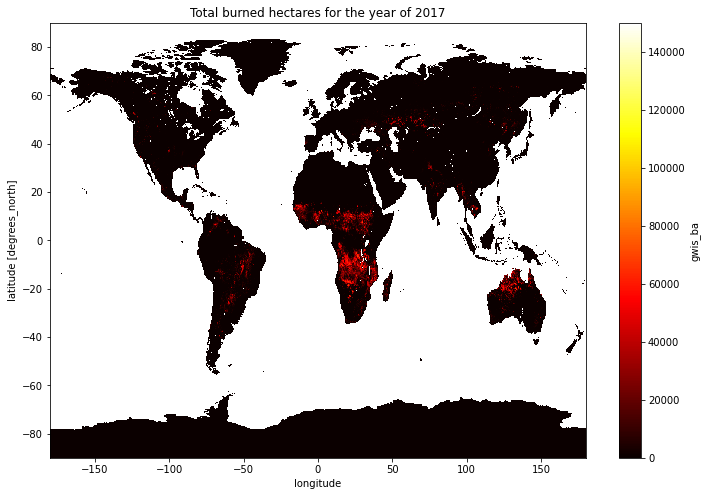

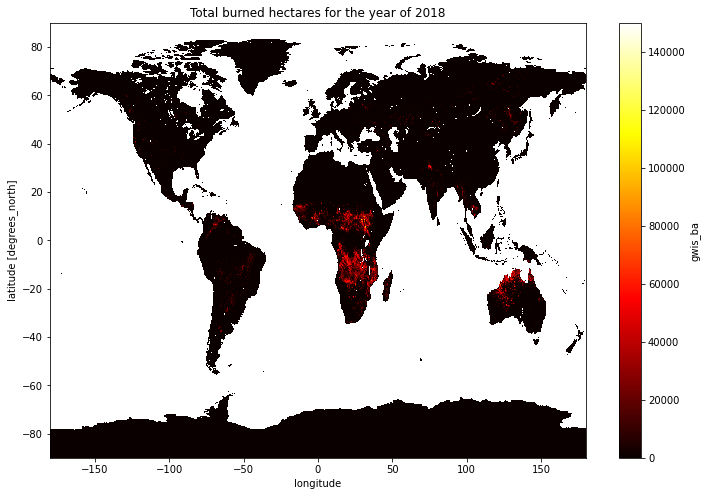

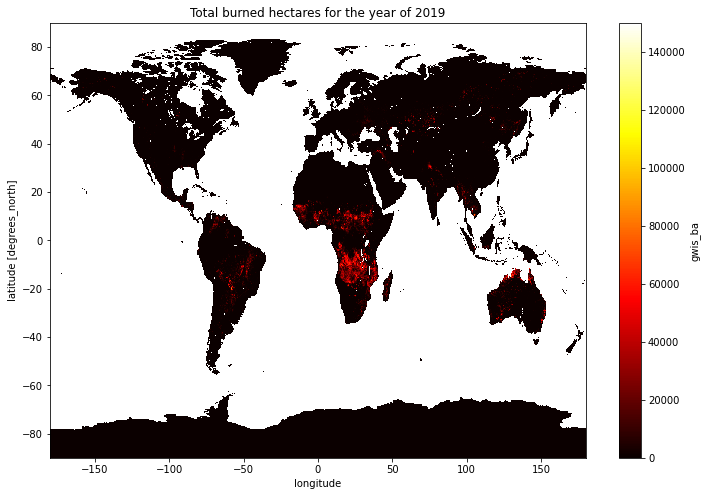

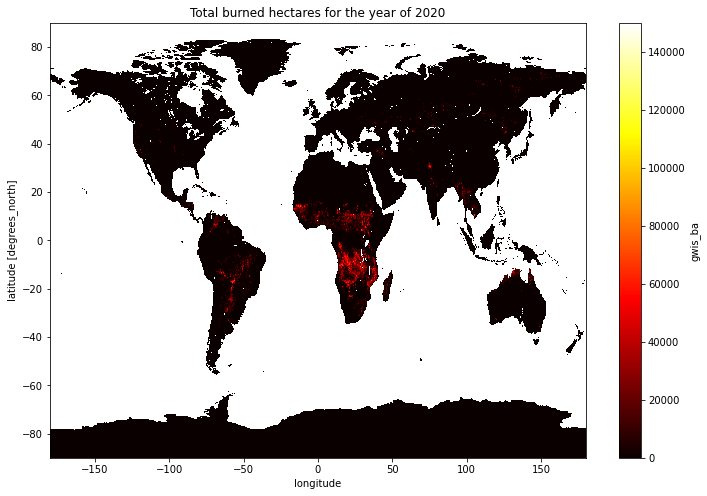

In [22]:
for i in range (20):
    figure(figsize=(12, 8))
    #cmap is for the colorbar 
    gwis_all[i,:,:].plot(vmin=0,vmax=150000,cmap='hot') #cmap="OrRd"
    plt.title('Total burned hectares for the year of '+str(i+2001))
    #plt.tight_layout()
    #this would save your images
    #you can increase the dpi for better resolution 
    plt.savefig('BAs_year_'+str(i+2001), bbox_inches='tight', dpi=200, quality=95)
    plt.show()

## now lets make a GIF

In [17]:

#sort the pngs
files = sorted(glob.glob("BAs*.png"))


In [18]:
#make sure you have the files in the correct order
files

['BAs_year_2001.png',
 'BAs_year_2002.png',
 'BAs_year_2003.png',
 'BAs_year_2004.png',
 'BAs_year_2005.png',
 'BAs_year_2006.png',
 'BAs_year_2007.png',
 'BAs_year_2008.png',
 'BAs_year_2009.png',
 'BAs_year_2010.png',
 'BAs_year_2011.png',
 'BAs_year_2012.png',
 'BAs_year_2013.png',
 'BAs_year_2014.png',
 'BAs_year_2015.png',
 'BAs_year_2016.png',
 'BAs_year_2017.png',
 'BAs_year_2018.png',
 'BAs_year_2019.png',
 'BAs_year_2020.png']

In [ ]:
#if the previous doen't sort them correctly choose the following code
#You ll need the following code one of you don't have the appropiate title in your pngs 
#Sort the files by order of creation
# files = glob.glob("BAs*.png")
# files.sort(key=os.path.getmtime)

In [19]:
#make sure all images have the same shape and size
for i in files:
    im = Image. open(i)
    print(im. info['dpi'])
    print(im)

(199.9996, 199.9996)
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1945x1377 at 0x7FA2B77C5490>
(199.9996, 199.9996)
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1963x1377 at 0x7FA2C4179640>
(199.9996, 199.9996)
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1945x1377 at 0x7FA2C6762D00>
(199.9996, 199.9996)
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1945x1377 at 0x7FA2C77F0220>
(199.9996, 199.9996)
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1963x1377 at 0x7FA2C6762D00>
(199.9996, 199.9996)
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1945x1377 at 0x7FA2C77F02E0>
(199.9996, 199.9996)
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1963x1377 at 0x7FA2C6762D00>
(199.9996, 199.9996)
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1963x1377 at 0x7FA2C77F0220>
(199.9996, 199.9996)
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1963x1377 at 0x7FA2C6762D00>
(199.9996, 199.9996)
<PIL.PngImagePlugin.PngImageFile image mode

In [20]:
#probably it would not be the same so you have to resize, make background white and save 
for i in files:
    im = Image. open(i)
    #print(im)
    #this is a size I choose you can choose a different one as well
    img_resized = im.resize((2179,1579)) 
    im = ImageOps.expand(img_resized)
    #make background white so that the titles will appear 
    fill_color=(255,255,255,255)
    background = Image.new(im.mode[:-1], im.size, fill_color)
    background.paste(im, im.split()[-1]) # omit transparency
    im = background
    #you can increase the dpi as well(300 is a very good one)
    new_img = im.save('final_'+i, dpi=(100,100))

In [21]:
#sort again 
files = sorted(glob.glob("final*.png"))

In [22]:
files

['final_BAs_year_2001.png',
 'final_BAs_year_2002.png',
 'final_BAs_year_2003.png',
 'final_BAs_year_2004.png',
 'final_BAs_year_2005.png',
 'final_BAs_year_2006.png',
 'final_BAs_year_2007.png',
 'final_BAs_year_2008.png',
 'final_BAs_year_2009.png',
 'final_BAs_year_2010.png',
 'final_BAs_year_2011.png',
 'final_BAs_year_2012.png',
 'final_BAs_year_2013.png',
 'final_BAs_year_2014.png',
 'final_BAs_year_2015.png',
 'final_BAs_year_2016.png',
 'final_BAs_year_2017.png',
 'final_BAs_year_2018.png',
 'final_BAs_year_2019.png',
 'final_BAs_year_2020.png']

In [23]:
#play with fps to make it slower or faster
images = []
for i in files:
    images.append(imageio.imread(i))
imageio.mimsave('BAs_GWIS_gif_fps09.gif', images,format='GIF', fps=0.9)

/tmp/ipykernel_413958/2412458861.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(i))


In [ ]:
## in SeasFire Datacube v2.0 the burned area variables would have the water bodies masked with ERA-5 land sea mask 